**RIESGO DE SALUD MENTAL - MODELOS DE K-MEANS**   

Después de explorar los datos, vamos a aplicar agrupamiento (clustering) para identificar grupos de personas con características similares. Esto nos permite entender mejor cómo se relacionan salud mental, estrés y productividad, y puede ayudar a tomar decisiones o planificar acciones según las necesidades de cada grupo.


In [7]:
# Importación de librerías
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

# Carga del Dataset
df = pd.read_csv("salud_mental.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

In [8]:
# Selección de variables que vamos a usar en nuestro algoritmo 
df_final = df[["age", "depression_score", "stress_level", "productivity_score"]]
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 10000 non-null  int64  
 1   depression_score    10000 non-null  int64  
 2   stress_level        10000 non-null  int64  
 3   productivity_score  10000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


In [9]:
# Estandarizar los datos
scaler = StandardScaler()
df_final_scaled = scaler.fit_transform(df_final)


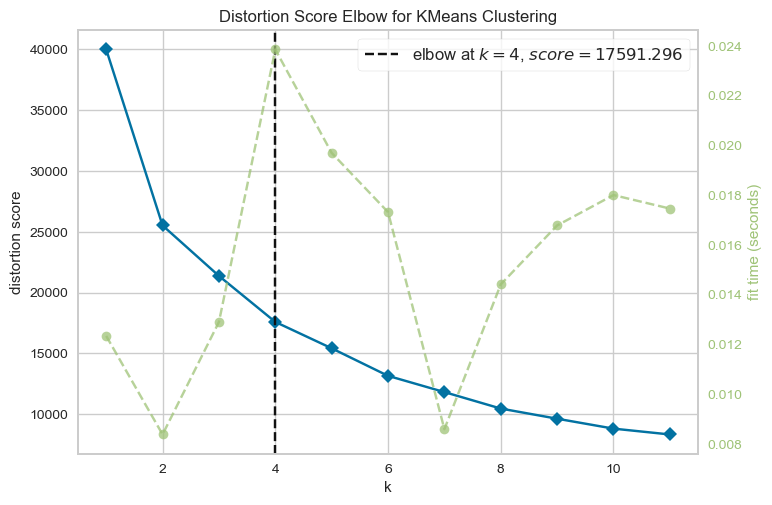

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Buscamos la cantidad óptima de clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_final_scaled)       
visualizer.show()       

In [11]:
# Creamos el modelo K-Means con 4 clusters y lo ajustamos a los datos
modelo = KMeans(n_clusters=4, max_iter=1000, init='random', random_state=42)
preds = modelo.fit_predict(df_final_scaled)
modelo


KMeans(init='random', max_iter=1000, n_clusters=4, random_state=42)

In [12]:
# Unimos los clusters al DataFrame original y calculamos la media de cada variable por grupo
preds=pd.DataFrame(preds)
df_concat=pd.concat([df_final, preds], axis=1)
df_concat=df_concat.rename(columns = {0:'cluster'})
df_concat.groupby("cluster")[["age", "depression_score", "stress_level", "productivity_score"]].mean()



,age,depression_score,stress_level,productivity_score
cluster,,,,
0,42.280825,7.898483,2.894982,88.318164
1,53.983924,22.945177,5.757214,65.167148
2,41.094547,7.350333,8.143978,89.242958
3,28.996333,22.693969,5.522005,65.395395


**CONCLUSIONES**  

Cluster 0: Adultos de mediana edad con baja depresión y estrés, y alta productividad.  
Cluster 1: Adultos mayores con alta depresión y estrés moderado, y productividad baja.  
Cluster 2: Adultos de mediana edad con baja depresión pero estrés alto, y alta productividad.  
Cluster 3: Jóvenes adultos con alta depresión y estrés moderado, y productividad baja. 

El análisis muestra que la depresión y el estrés tienen un efecto sobre la productividad: a mayor depresión o estrés, la productividad tiende a ser menor, mientras que con niveles bajos se mantiene más alta. Además, la edad por sí sola no determina los niveles de depresión, estrés o productividad, lo que sugiere que otros factores, como hábitos de vida o soporte social, también influyen en la salud mental y el desempeño.